In [51]:
from simpleOption import *

import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

理論価格＝116.52


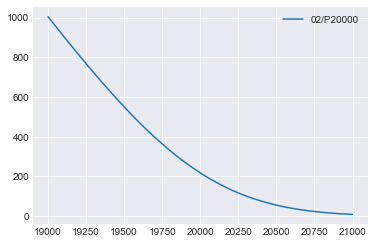

In [11]:
# simlpe graph
op = Option('02/P20000')    
setting(20250, 26, 20190204)    #マーケット情報（IV26％と仮定）
print(f'理論価格＝{op.v():.2f}' )


x = np.arange(19000, 21000)     #グラフを描く範囲(日経平均価格範囲）
plt.plot(x, np.vectorize(op.v)(x), label= op )	
plt.legend(loc="best")

In [40]:
#portfolio
class Portfolio():
	"""簡単なポートフォリオクラス"""
	def __init__(self, lines):
		'''
		:param lines: str
		
		Example:
		p = Portfolio(
			"""
				02/C21000[1]
				02/C21250[-2]
				02/C21500[1]
			""")
		'''
		self.items = []
		self.nums = []
		for s in lines.strip().splitlines():
			x = parse("{str_op}[{num:d}]", s.strip())
			self.items.append(Option(x['str_op']))
			self.nums.append(x['num'])

	def v(self, underlying=None, iv=None, evoluationDate=None):
		setting(underlying, iv, evoluationDate)
		return sum(op.v() * num for op, num in zip(self.items, self.nums))
	
	def pay(self ,underlying ):
		return sum(op.pay(underlying) * num for op, num in zip(self.items, self.nums))

In [41]:
p = Portfolio(
"""
	02/C21000[1]
	02/C21250[-2]
	02/C21500[1]
""")

setting(20250, 26, 20190204)    #マーケット情報設定（IV26％と仮定）





19.629071550477533

理論価格＝4.72


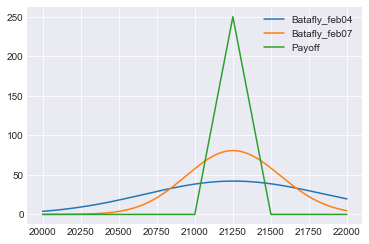

In [50]:




x = np.arange(20000, 22000)     #グラフを描く範囲(日経平均価格範囲）

setting(20250, 26, 20190204)    #マーケット情報（IV26％と仮定）
plt.plot(x, np.vectorize(p.v)(x), label= 'Batafly_feb04' )

setting(evaluationDate=20190207) #日付を経過させてみる
plt.plot(x, np.vectorize(p.v)(x), label= 'Batafly_feb07' )


plt.plot(x, np.vectorize(p.pay)(x), label= 'Payoff' )
plt.legend(loc="best")